In [19]:

from PyFoam.Execution.ConvergenceRunner import ConvergenceRunner
from PyFoam.Execution.UtilityRunner import UtilityRunner
from PyFoam.LogAnalysis.BoundingLogAnalyzer import BoundingLogAnalyzer
from PyFoam.RunDictionary.SolutionFile import SolutionFile
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory

import pyvista as vtki
import numpy as np
import os
import glob


#model_name

solver="icoFoam"
case="cavity"
#pCmd="calcPressureDiff*erence"
#mCmd="calcMassFlow"

Home_Folder='/home/frederik/flunnpy'
%cd $Home_Folder
model_name_STL=glob.glob('*.stl')[0]
model_name=os.path.splitext(model_name_STL)[0]

STL_Folder=os.path.join(Home_Folder, case,'constant/triSurface')
STL_File_To_Replace=os.path.join(Home_Folder, case,'constant/triSurface/model.stl')
ModelArchivFolder=os.path.join(Home_Folder,'Models')
Case_Folder=os.path.join(Home_Folder, case)
Model_Path=os.path.join(Home_Folder,model_name_STL)
SolutionPNG_Folder=os.path.join(Home_Folder,'Solutions_PNG')
%cd $Case_Folder
!./Allclean
%cp $Model_Path $STL_File_To_Replace
#%mv $Model_Path $ModelArchivFolder
!./Allrun
%cd $Home_Folder
dire=SolutionDirectory(case,archive="InletVel")
dire.clearResults()
#dire.addBackup("PyFoamSolve.logfile")
#dire.addBackup("PyFoamSolve.analyzed")
#dire.addBackup("Pressure.analyzed")
#dire.addBackup("MassFlow.analyzed")
dire.addBackup("constant")
dire.addBackup("system")
    
sol=SolutionFile(dire.initialDir(),"U")

/home/frederik/flunnpy
/home/frederik/flunnpy/cavity
Cleaning /home/frederik/flunnpy/cavity case
Running surfaceFeatures on /home/frederik/flunnpy/cavity
Running blockMesh on /home/frederik/flunnpy/cavity
Running decomposePar on /home/frederik/flunnpy/cavity
Running snappyHexMesh on /home/frederik/flunnpy/cavity
Running patchSummary on /home/frederik/flunnpy/cavity
/home/frederik/flunnpy


Wandgeschw: 0.0
Last Time =  0.0004
/home/frederik/flunnpy/cavity/InletVel/vel=0
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Jan 03 2020
Time   : 21:09:12
Host   : "frederik-WRT-WX9"
PID    : 14910
I/O    : uncollated
Case   : /home/frederik/flunnpy/cavity/InletVel/vel=0
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

 PyFoam WARNING on line 509 of file /home/frederik/anaconda3/lib/python3.7/site-packages/PyFoam/Execution/BasicRunner.py : Stopping run and writting 


/home/frederik/flunnpy/cavity/InletVel/vel=0/VTK


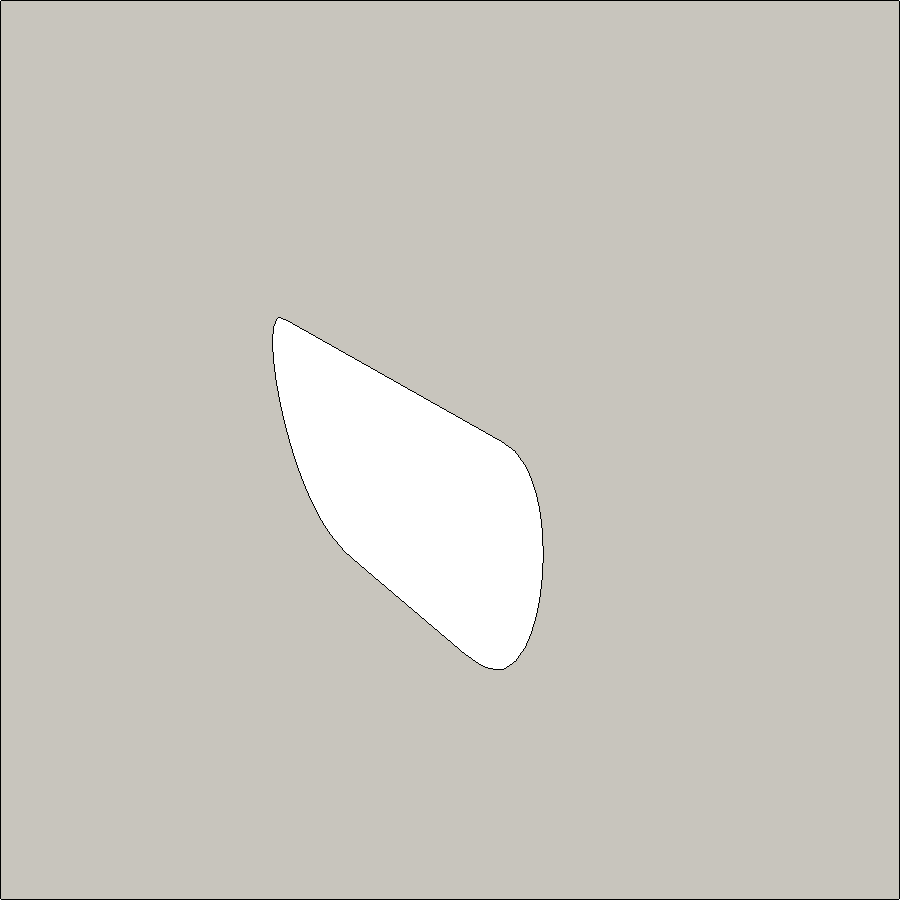

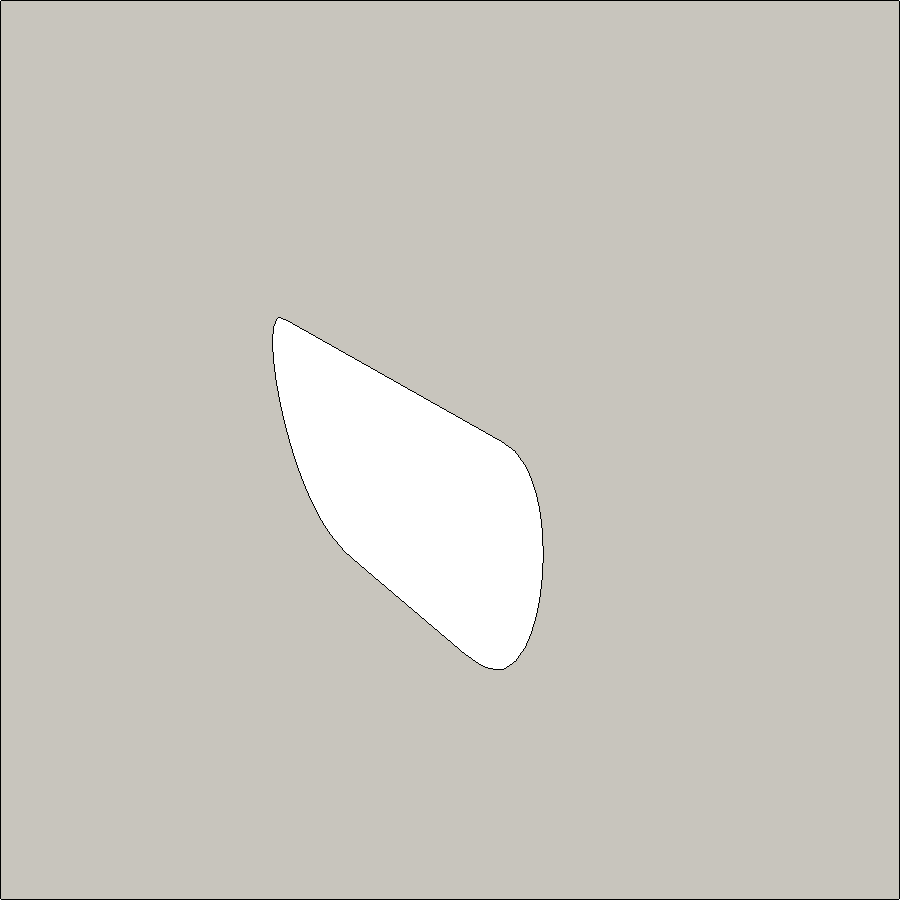

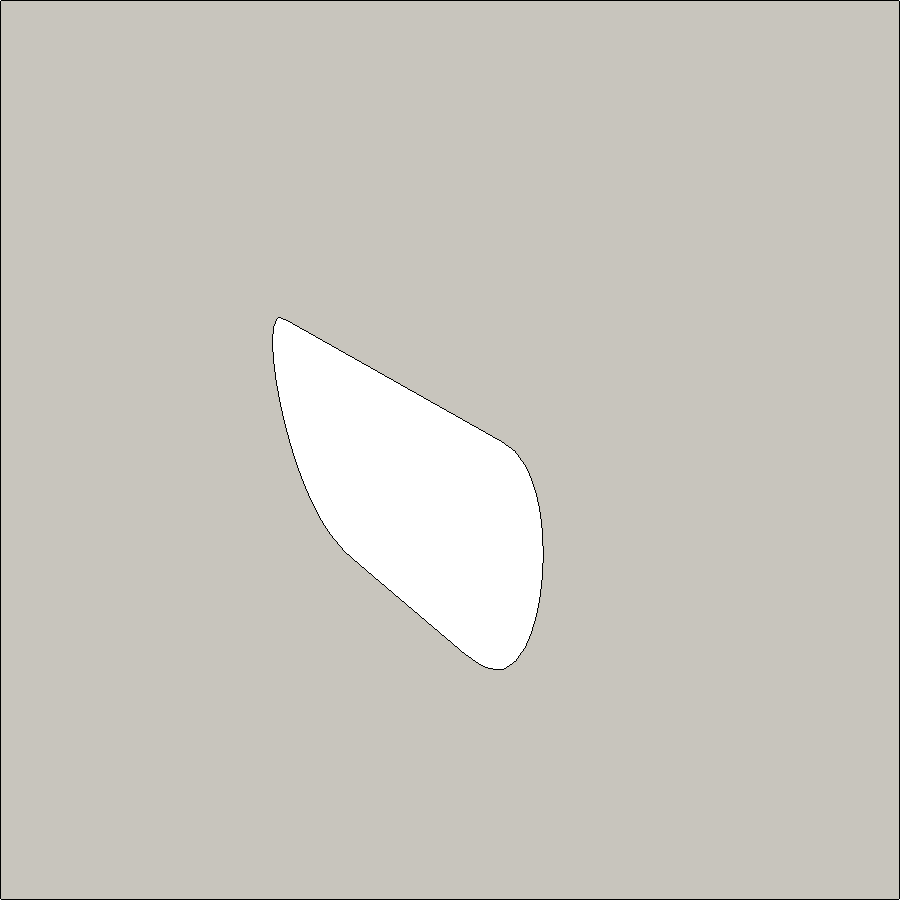

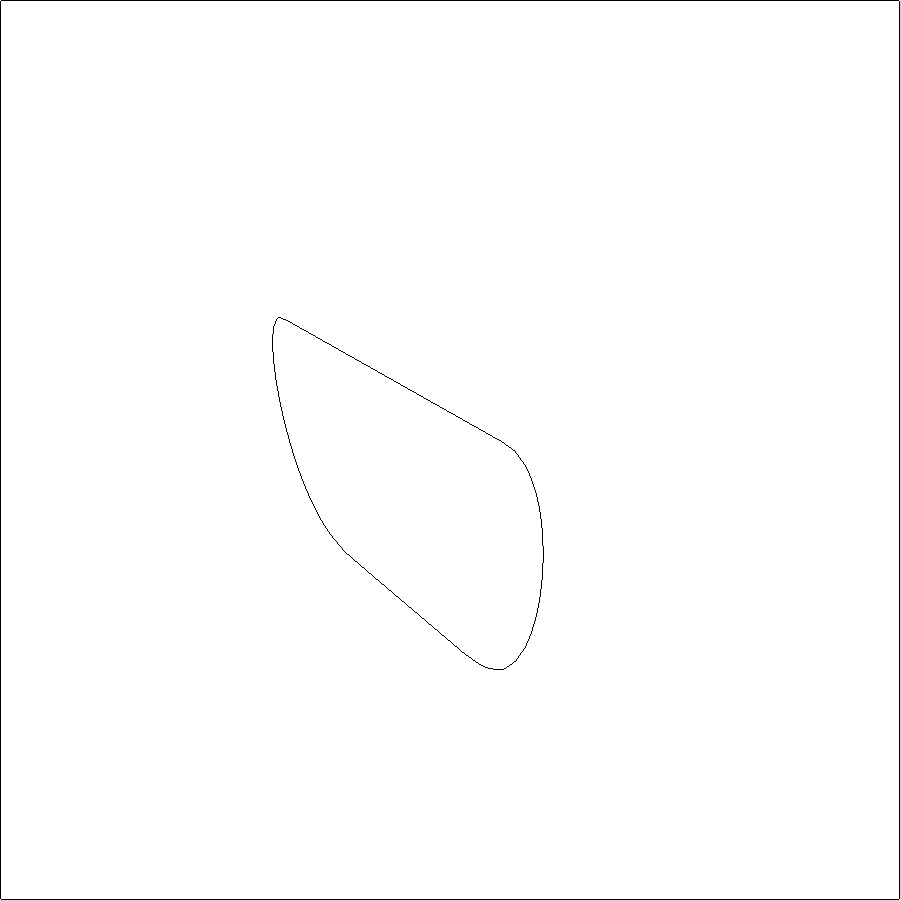

/home/frederik/flunnpy
Wandgeschw: 1.0


 PyFoam WARNING on line 509 of file /home/frederik/anaconda3/lib/python3.7/site-packages/PyFoam/Execution/BasicRunner.py : Stopping run and writting 


Last Time =  1
/home/frederik/flunnpy/cavity/InletVel/vel=1
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Jan 03 2020
Time   : 21:09:27
Host   : "frederik-WRT-WX9"
PID    : 14952
I/O    : uncollated
Case   : /home/frederik/flunnpy/cavity/InletVel/vel=1
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

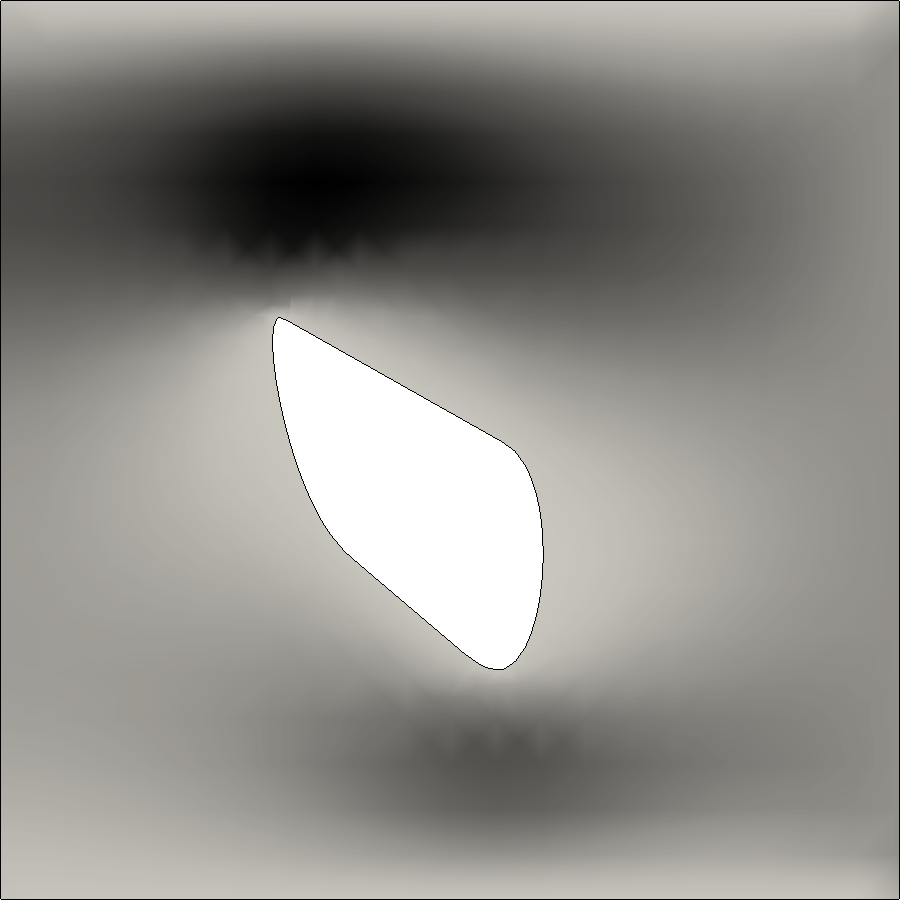

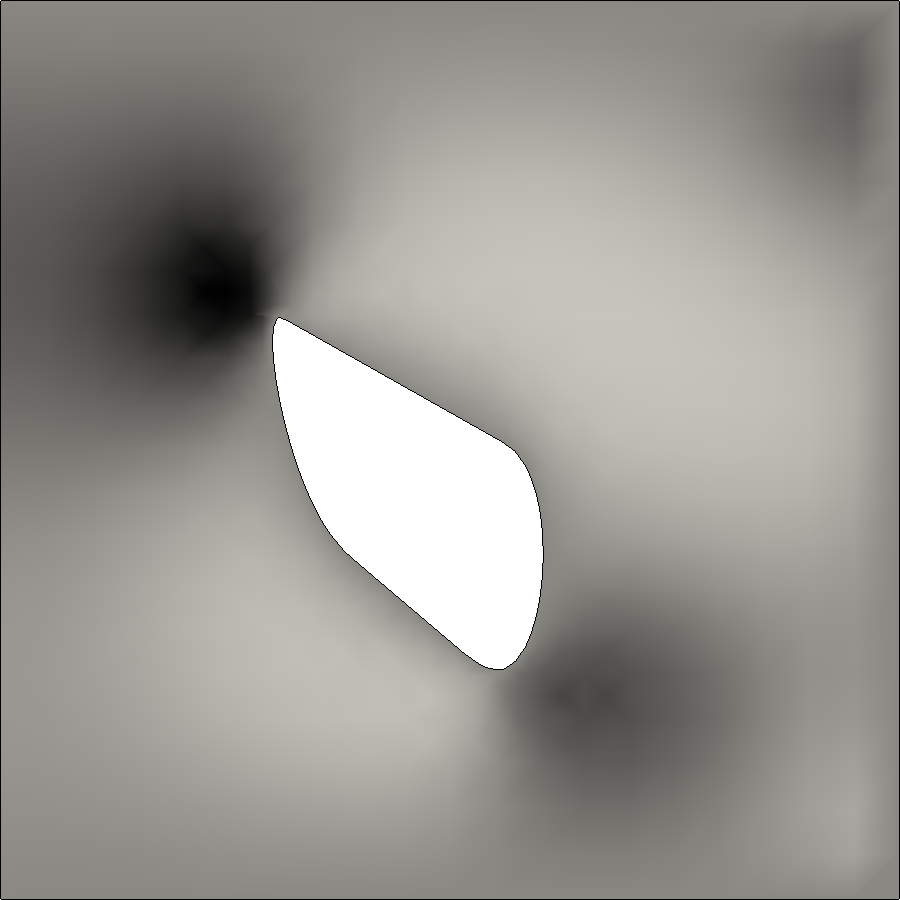

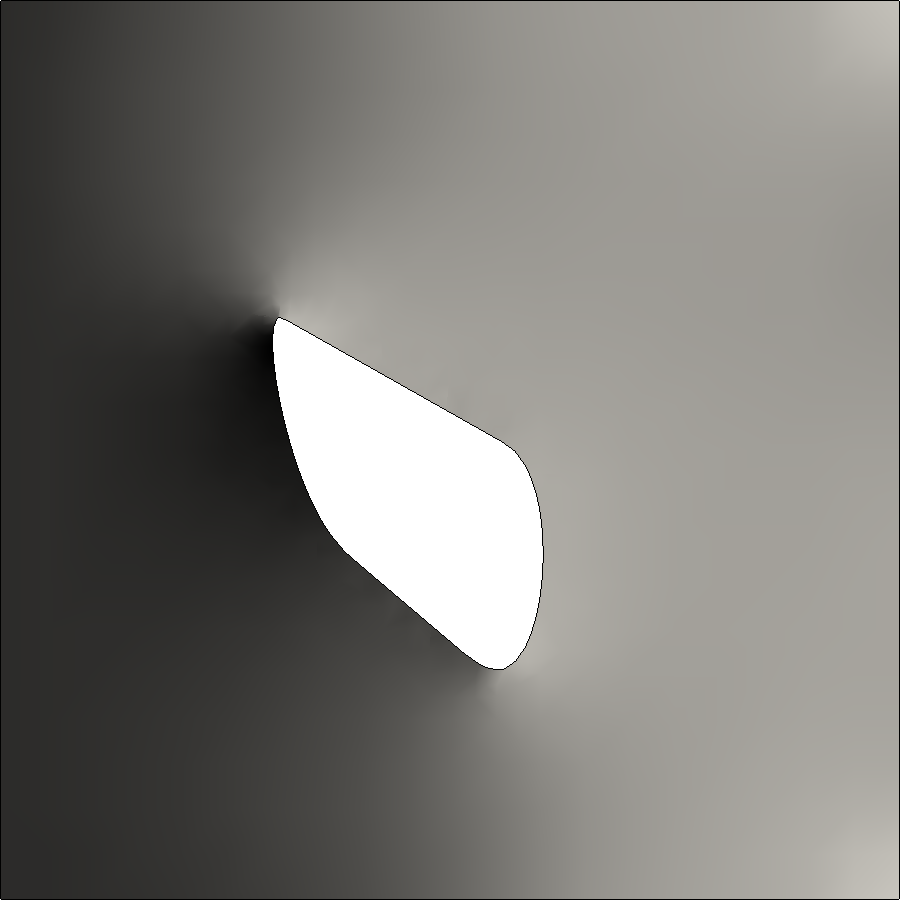

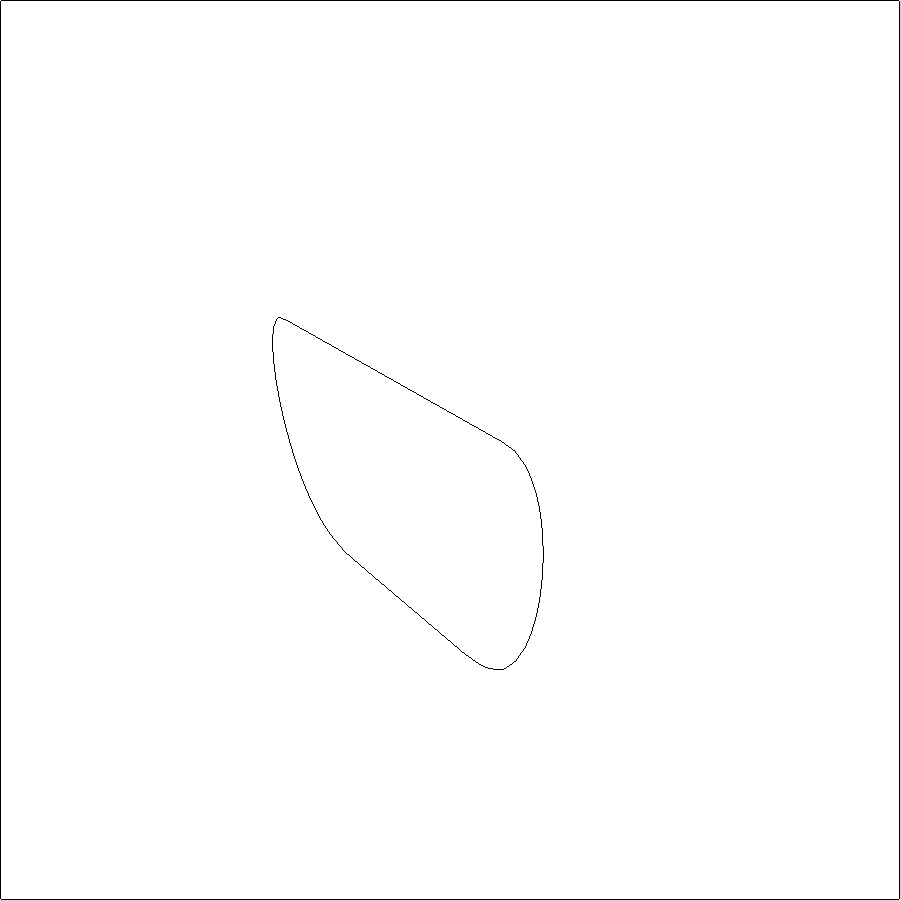

/home/frederik/flunnpy


In [20]:
maximum=1.
nr=1
name="InletVelResults" 
f=dire.makeFile(name)
 
for i in range(nr+1):
    # Set the boundary condition at the inlet
    val=(maximum*i)
    print("Wandgeschw:",val)
    sol.replaceBoundary("left","(%f 0 0)" %(val))

    # Run the solver
    run=ConvergenceRunner(BoundingLogAnalyzer(),argv=[solver,"-case",case],silent=True)
    run.start()
    
    print("Last Time = ",dire.getLast())

    # Get the pressure difference (Using an external utility)
    #pUtil=UtilityRunner(argv=[pCmd,"-case",case],silent=True,logname="Pressure")
    #pUtil.add("deltaP","Pressure at .* Difference .*\] (.+)")
    #pUtil.start()

    #deltaP=pUtil.get("deltaP")[0]

    # Get the mass flow
    #mUtil=UtilityRunner(argv=[mCmd,"-case",case,"-latestTime"],silent=True,logname="MassFlow")
    #mUtil.add("mass","Flux at (.+?) .*\] (.+)",idNr=1)
    #mUtil.start()

    #massFlow=mUtil.get("mass",ID="outlet")[0]

    # Archive the results
    
    dire.lastToArchive("vel=%g" % (val))
    
    CurrentPath=os.path.join('/home/frederik/flunnpy', case, 'InletVel',"vel=%g" % (val))
    SolutionName=model_name+'_'+case+'_'+"vel_%g" % (val)
    
    %cd $CurrentPath
    !foamToVTK

    VTK_File_Path=os.path.join(CurrentPath,'VTK')
    %cd $VTK_File_Path
    vtk_filename=glob.glob('*.vtk')
    vtk_filename[0]
    grid = vtki.UnstructuredGrid(vtk_filename[0])
  
    
    vtki.set_plot_theme("document")
    X_Y = grid.slice(normal=[0, 0, 1])
    cpos=[(0.05, 0.05, 0.192), 
     (0.05, 0.05, 0.01), 
     (0, 1, 0)]
    #clim=[-10,10]
    cmap='Greys'
    dargs1 = dict(scalars=X_Y.point_arrays['U'][:,0],cmap='Greys', show_edges=False)
    dargs2 = dict(scalars=X_Y.point_arrays['U'][:,1],cmap='Greys', show_edges=False)
    dargs3 = dict(scalars=X_Y.point_arrays['p'],cmap='Greys', show_edges=False)
    dargs4 = dict(scalars=X_Y.point_arrays['p']*0,cmap='bwr', show_edges=False)
    #grid.plot()
    plotter1 = vtki.Plotter(window_size=[900,900],off_screen=True,border=False)
    plotter2 = vtki.Plotter(window_size=[900,900],off_screen=True,border=False)
    plotter3 = vtki.Plotter(window_size=[900,900],off_screen=True,border=False)
    plotter4 = vtki.Plotter(window_size=[900,900],off_screen=True,border=False)
    
    #Plotter1 creates Plot with vel in x direction
    plotter1.add_mesh(X_Y,**dargs1)
    edges = X_Y.extract_edges(12)
    plotter1.add_mesh(edges, color="black", line_width=1)
    plotter1.view_xy()
    Solution_FileX=SolutionName+'_X'+'.png'
    plotter1.show(cpos=cpos,screenshot=Solution_FileX)
    %cp $Solution_FileX $SolutionPNG_Folder 
    
    #Plotter2 creates Plot with vel in y direction
    plotter2.add_mesh(X_Y,interpolate_before_map=False,**dargs2)
    plotter2.add_mesh(edges, color="black", line_width=1)
    plotter2.view_xy()
    Solution_FileY=SolutionName+'_Y'+'.png'
    plotter2.show(cpos=cpos,screenshot=Solution_FileY)
    %cp $Solution_FileY $SolutionPNG_Folder 
    
    #Plotter3 creates Plot with Pressure
    plotter3.add_mesh(X_Y,border=True,interpolate_before_map=False,**dargs3)
    plotter3.add_mesh(edges, color="black", line_width=1)
    plotter3.view_xy()
    Solution_FileP=SolutionName+'_P'+'.png'
    plotter3.show(cpos=cpos,screenshot=Solution_FileP)
    %cp $Solution_FileP $SolutionPNG_Folder 
    
    #Plotter4 creates blank Plot with Geometry
    plotter4.add_mesh(edges, color="black", line_width=1,cmap=cmap)
    plotter4.view_xy()
    Solution_FileMesh=SolutionName+'_Mesh'+'.png'
    plotter4.show(cpos=cpos,screenshot=Solution_FileMesh)
    %cp $Solution_FileMesh $SolutionPNG_Folder 
    
    
    
    
    %cd /home/frederik/flunnpy
    # Clear results
    dire.clearResults()

    # Output current stuff
    #print("Vel: ",val,"DeltaP: ",deltaP,"Mass Flow:",massFlow)
    #f.writeLine( (val,deltaP,massFlow) )
    
sol.purgeFile()


/home/frederik/flunnpy/cavity/InletVel/vel=1
/home/frederik/flunnpy/cavity/InletVel/vel=1/VTK


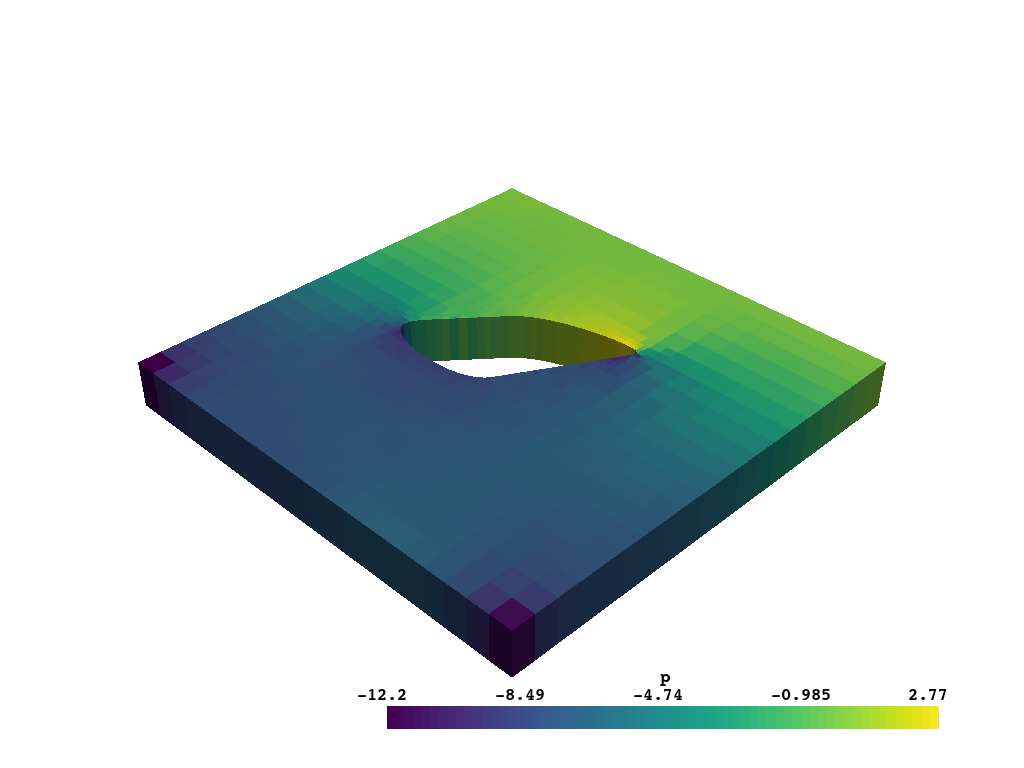

In [6]:
%cd $CurrentPath
%cd $VTK_File_Path
vtk_filename=glob.glob('*.vtk')
vtk_filename[0]
grid = vtki.UnstructuredGrid(vtk_filename[0])
#grid.plot()
plotter = vtki.Plotter(off_screen=False)
plotter.add_mesh(grid)
plotter.show(screenshot=SolutionName)
Solution_File=SolutionName+'.png'
%cp $Solution_File $SolutionPNG_Folder 

In [7]:
vtk_filename=str(glob.glob('*.png')[0])
vtk_filename

'No7_A_0-00_L0-11_cavity_vel_1_P.png'

In [8]:
a=str(SolutionPNG_Folder)
a

'/home/frederik/flunnpy/Solutions_PNG'

In [9]:
%cp $vtk_filename $a

/home/frederik/flunnpy/cavity/InletVel/vel=1
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Jan 03 2020
Time   : 21:05:56
Host   : "frederik-WRT-WX9"
PID    : 14625
I/O    : uncollated
Case   : /home/frederik/flunnpy/cavity/InletVel/vel=1
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Create mesh f

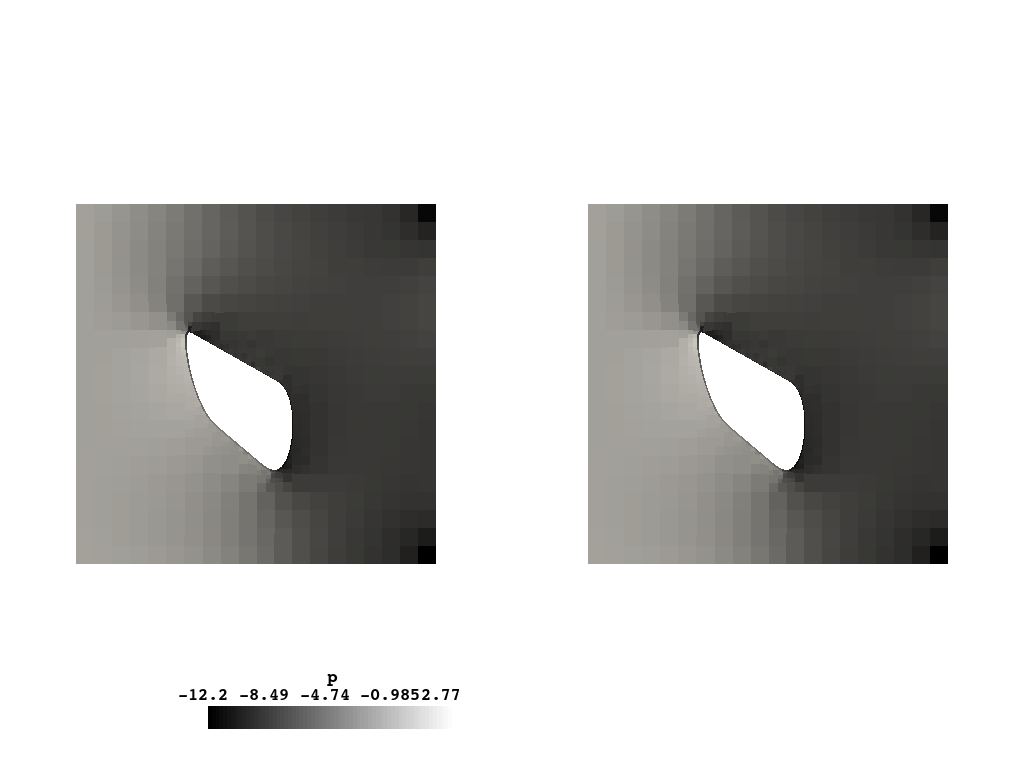

In [10]:
CurrentPath=os.path.join('/home/frederik/flunnpy', case, 'InletVel',"vel=%g" % (val))
SolutionName=model_name+'_'+case+'_'+"vel_%g" % (val)

%cd $CurrentPath
!foamToVTK

VTK_File_Path=os.path.join(CurrentPath,'VTK')
%cd $VTK_File_Path
vtk_filename=glob.glob('*.vtk')
vtk_filename[0]
grid = vtki.UnstructuredGrid(vtk_filename[0])
#grid.plot()
plotter = vtki.Plotter(shape=(1,2),off_screen=False,border=False)
plotter.add_mesh(grid,cmap="gray",interpolate_before_map=True)
plotter.subplot(0,1)
plotter.add_mesh(grid,cmap="gray",interpolate_before_map=False)
plotter.link_views()
plotter.view_xy()
plotter.show(screenshot=SolutionName)
Solution_File=SolutionName+'.png'



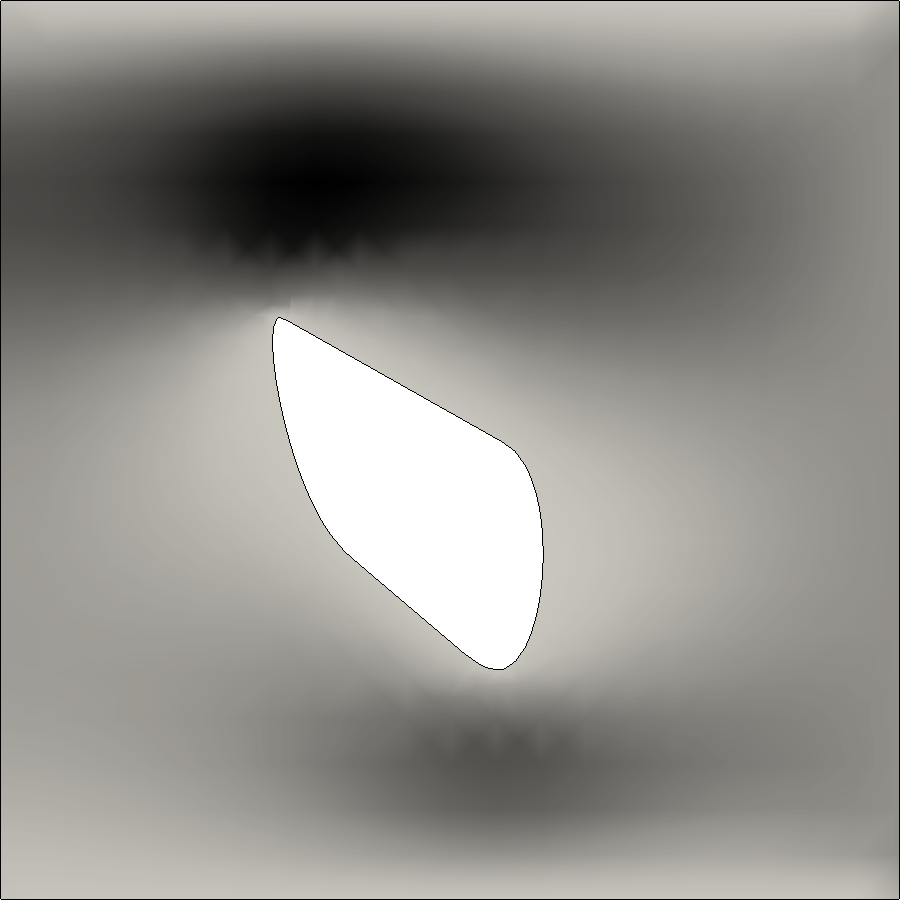

In [16]:
grid = vtki.UnstructuredGrid(vtk_filename[0])
vtki.set_plot_theme("document")
X_Y = grid.slice(normal=[0, 0, 1])
cpos=[(0.05, 0.05, 0.192), 
 (0.05, 0.05, 0.01), 
 (0, 1, 0)]
#clim=[-10,10]
dargs1 = dict(scalars=X_Y.point_arrays['U'][:,0],cmap='Greys', show_edges=False)
dargs2 = dict(scalars=X_Y.point_arrays['U'][:,1],cmap='Greys', show_edges=False)
dargs3 = dict(scalars=X_Y.point_arrays['p'],cmap='Greys', show_edges=False)
dargs4 = dict(scalars=X_Y.point_arrays['p']*0,cmap='bwr', show_edges=False)
#grid.plot()
plotter1 = vtki.Plotter(window_size=[900,900],off_screen=True,border=False)
plotter2 = vtki.Plotter(window_size=[900,900],off_screen=False,border=False)
plotter3 = vtki.Plotter(window_size=[900,900],off_screen=False,border=False)
plotter4 = vtki.Plotter(window_size=[900,900],off_screen=False,border=False)

plotter1.add_mesh(X_Y,**dargs1)
edges = X_Y.extract_edges(12)
plotter1.add_mesh(edges, color="black", line_width=1)
#plotter.update_scalar_bar_range(clim, name=None)
plotter1.view_xy()

Solution_FileX=SolutionName+'_X'+'.png'

#plotter1.show_bounds(mesh=grid,bounds=None,show_ylabels=False,show_xlabels=False)
plotter1.show(cpos=cpos,screenshot=Solution_FileX)


#plotter.update_scalar_bar_range(clim, name=None)



PolyData (0x7f3ff5c01168)
  N Cells:	875
  N Points:	862
  X Bounds:	0.000e+00, 1.000e-01
  Y Bounds:	0.000e+00, 1.000e-01
  Z Bounds:	5.000e-03, 5.000e-03
  N Arrays:	5

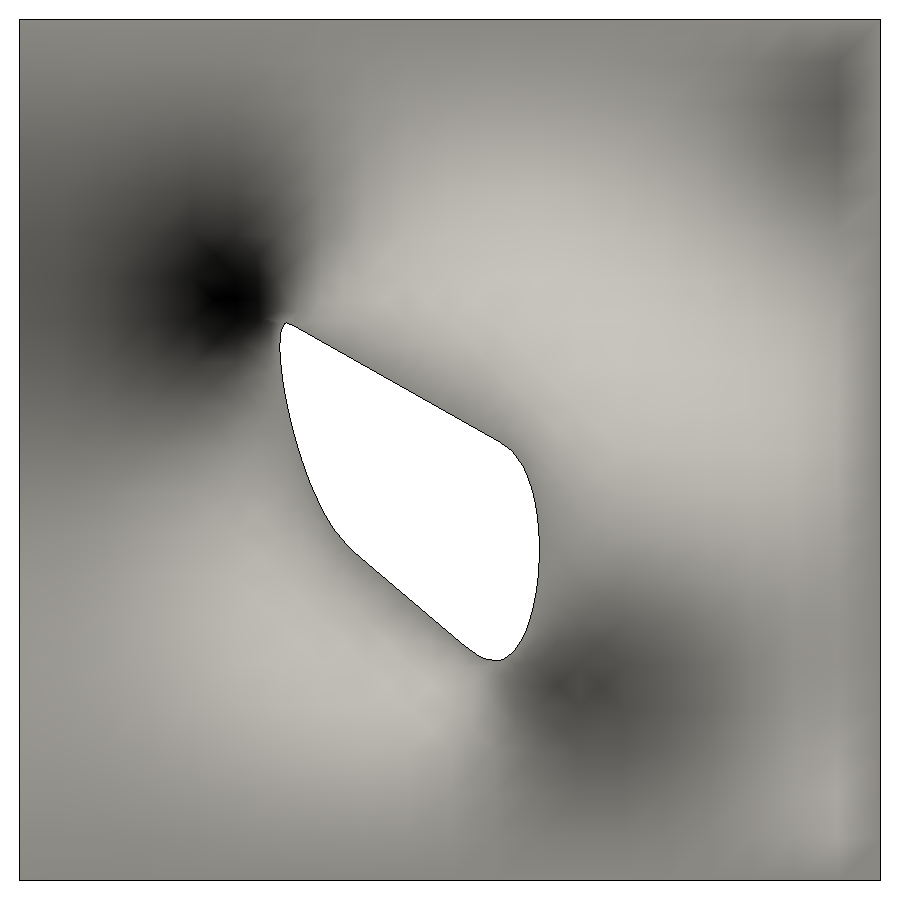

In [639]:
plotter2.add_mesh(X_Y,interpolate_before_map=False,**dargs2)
plotter2.add_mesh(edges, color="black", line_width=1)
plotter2.view_xy()
Solution_FileY=SolutionName+'_Y'+'.png'
plotter2.show(cpos=cpos,screenshot=Solution_FileY)


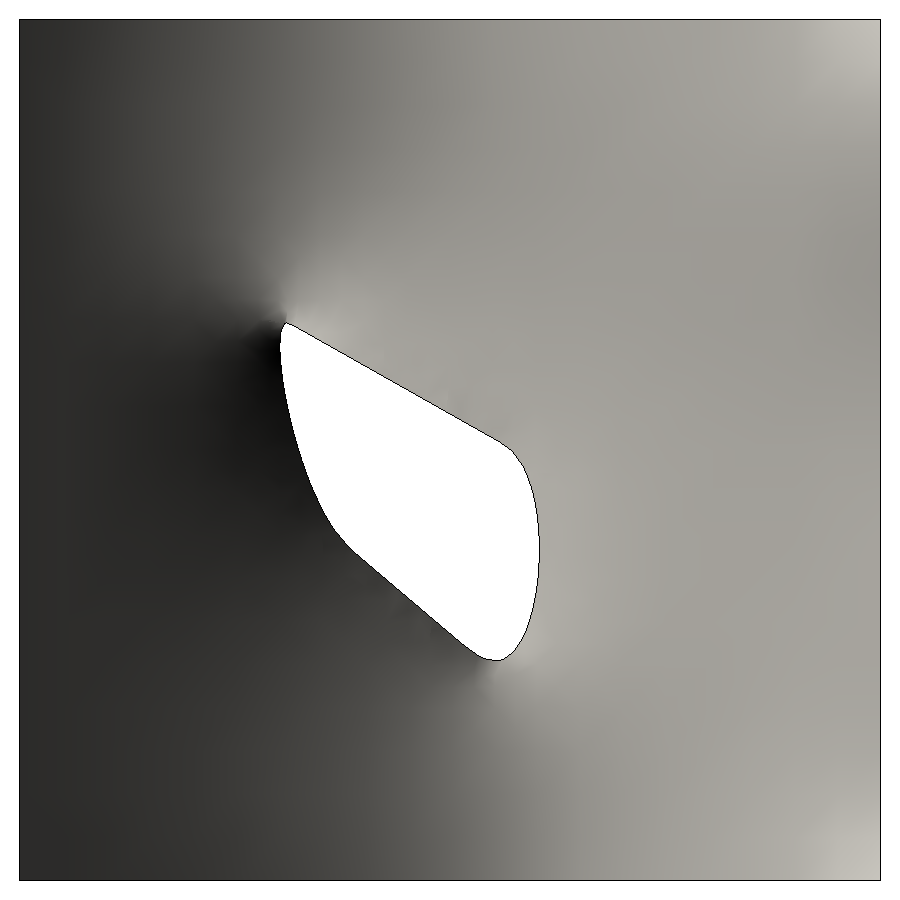

In [640]:
plotter3.add_mesh(X_Y,border=True,interpolate_before_map=False,**dargs3)
plotter3.add_mesh(edges, color="black", line_width=1)
plotter3.view_xy()
Solution_FileP=SolutionName+'_P'+'.png'
cpos=plotter3.show(cpos=cpos,screenshot=Solution_FileP)


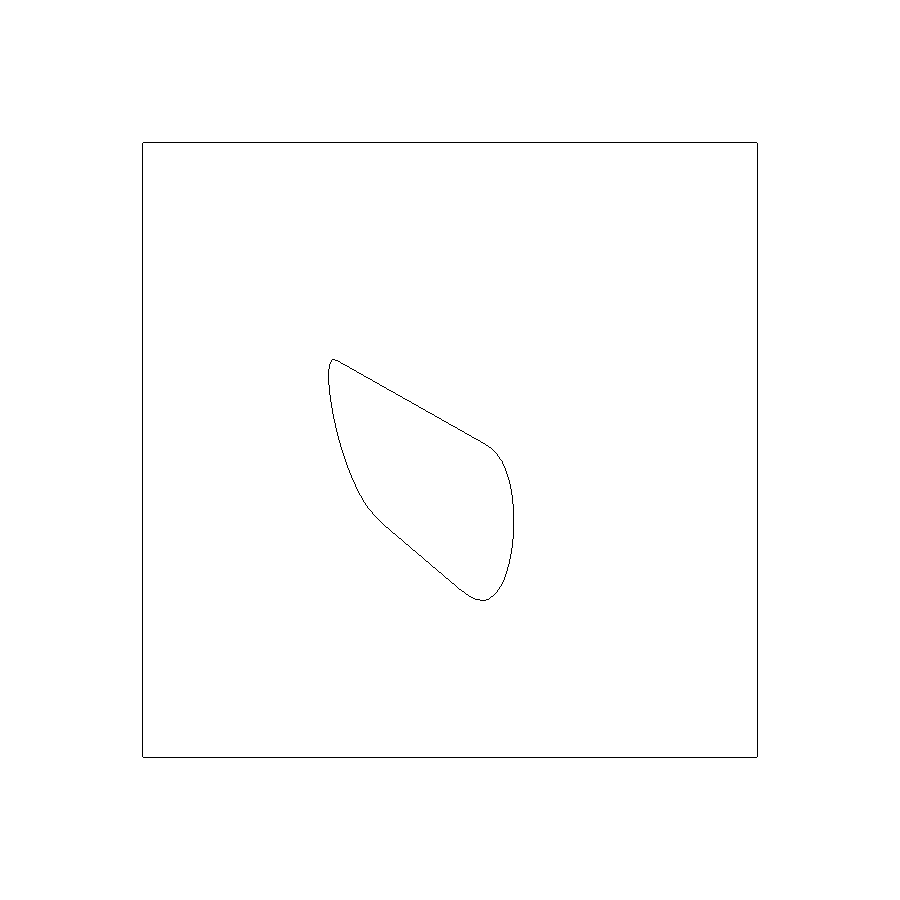

In [641]:
plotter4.add_mesh(edges, color="black", line_width=1,cmap=cmap)
plotter4.view_xy()
Solution_FileP=SolutionName+'_Mesh'+'.png'
plotter4.show(cpos=cpos,screenshot=Solution_FileP)


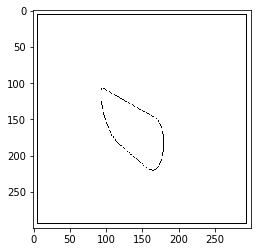

In [610]:
import matplotlib.pyplot as plt


imgplot=plt.imshow(plotter4.image, cmap=cmap)
#lum_img = plotter3.image[:, :, 0]
#plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [611]:
single_slice

PolyData (0x7f3ff0fa01c8)
  N Cells:	875
  N Points:	862
  X Bounds:	0.000e+00, 1.000e-01
  Y Bounds:	0.000e+00, 1.000e-01
  Z Bounds:	5.000e-03, 5.000e-03
  N Arrays:	6